In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from decoder import *

In [21]:
latest_file = max(Path(PATH).glob("*"), key=lambda x: x.stat().st_mtime)
#print(latest_file)
r = reader(latest_file.name)
r.raw = False 
w = HitWriter(n_samples=8)
ewt = EWTWriter()
r.get(verbose=0, writer=w, ewt_writer=ewt, n_max=2000000)
df = w.get()
df_ewt = ewt.get()
print(f"{latest_file.name}: {df.shape[0]} hits in EWT {df_ewt['EWT'].min()} to {df_ewt['EWT'].max()}.")

wb_test_037.bin: 400925 hits in EWT 1 to 2000000.


# DAQ Overview Plots

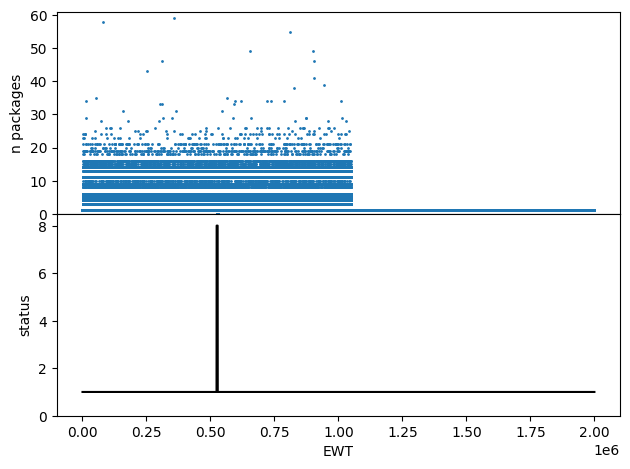

In [22]:
ax1 = plt.subplot(211)
plt.plot(df_ewt['EWT'], df_ewt['packages'],'.', markersize=2)
plt.ylabel("n packages")
plt.ylim([0,df_ewt['packages'].max()+2])
#plt.twinx()
ax2 = plt.subplot(212, sharex=ax1)
plt.plot(df_ewt['EWT'], df_ewt['status'],'-', color='black')
plt.xlabel("EWT")
plt.ylabel("status")
plt.ylim([0,max([8.5,df_ewt['status'].max()])])
plt.tight_layout()
plt.subplots_adjust(hspace=0)

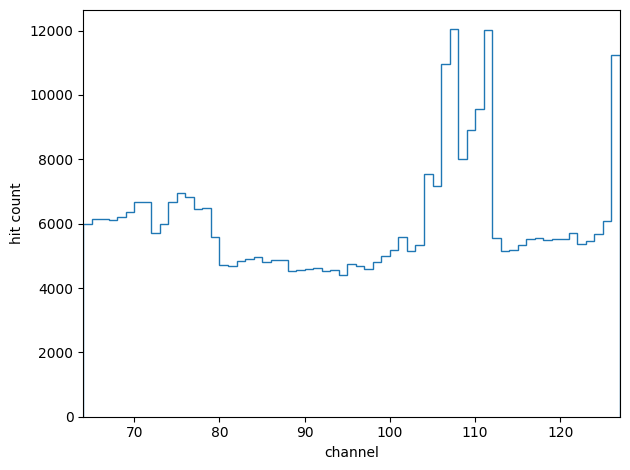

In [20]:
outliers = np.argwhere((df.channel<64)|(df.channel>=128)).shape[0]
plt.hist(df.channel, bins=np.arange(64,64*2,1), histtype='step',
        label=f"OUTLIERS: {outliers}");
if outliers>0:
    plt.legend()
#plt.hist(df.time.values & 0xff);
plt.xlim([64,64*2-1])
plt.xlabel("channel")
plt.ylabel("hit count")
plt.tight_layout()

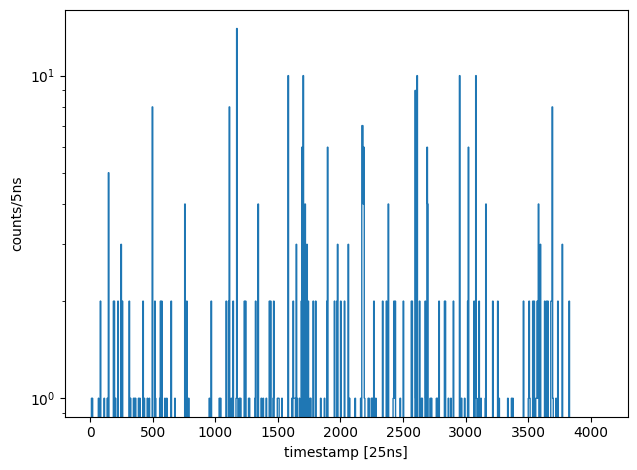

In [5]:
plt.hist(df.time.values & 0xfff, bins=np.arange(0,0xfff,5), histtype='step');
plt.xlabel("timestamp [25ns]")
plt.ylabel("counts/5ns")
plt.tight_layout()
plt.semilogy();

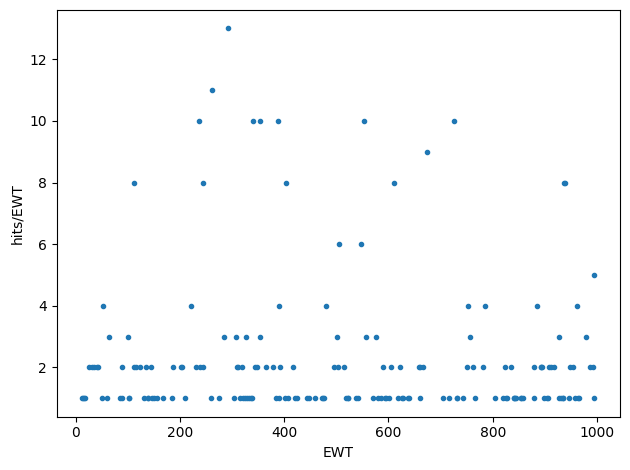

In [6]:
grouped = df.groupby('EWT').size()
plt.plot(grouped,'.')
plt.xlabel("EWT")
plt.ylabel("hits/EWT")
plt.tight_layout()

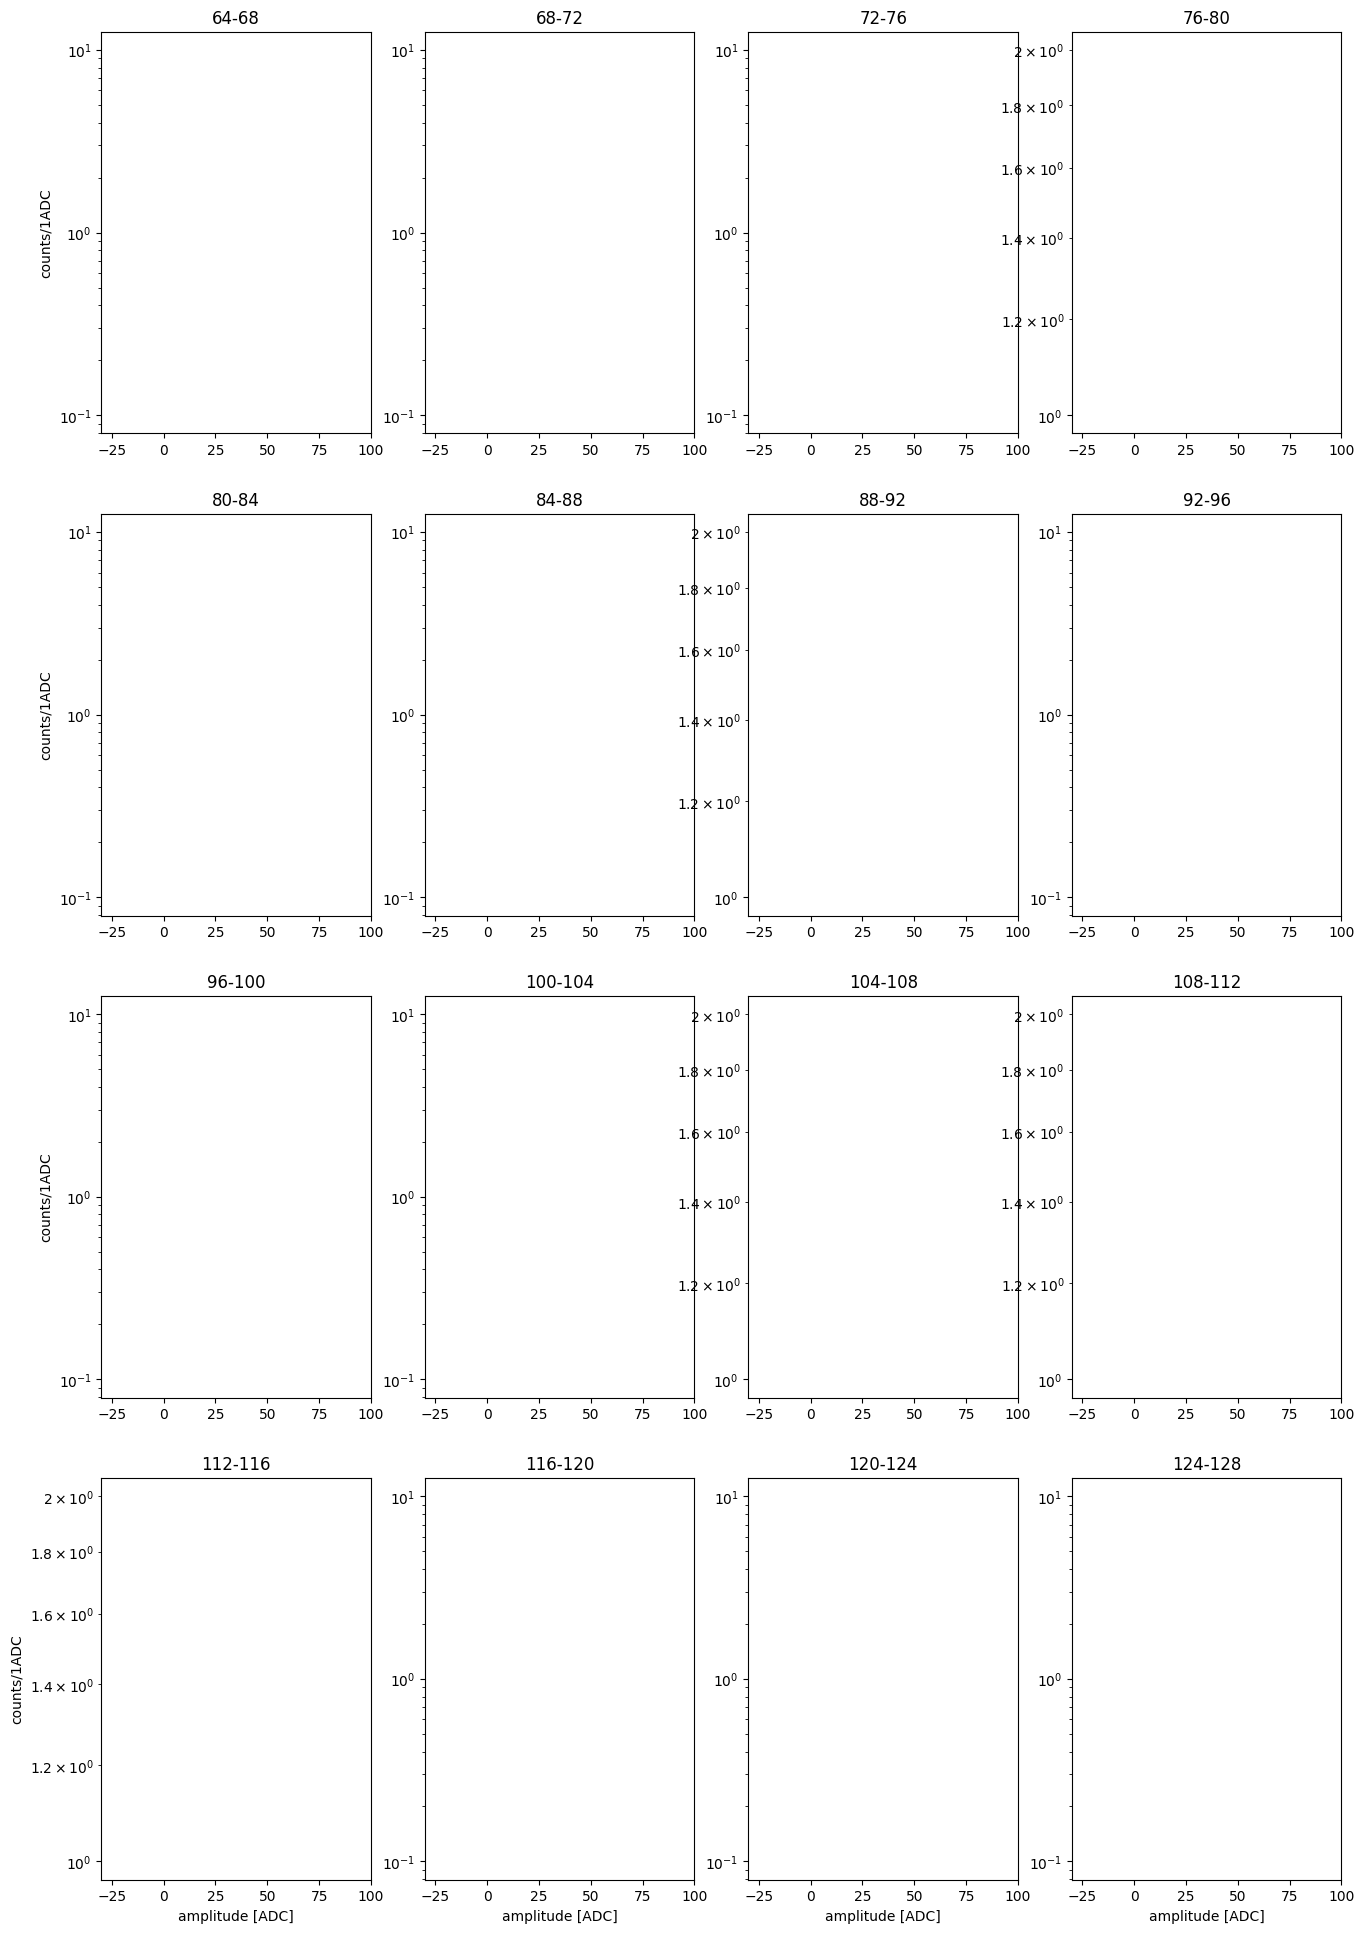

In [7]:
fig, axes = plt.subplots(4, 4, figsize=(16, 24))
axes_flat = axes.flatten()
for j, ch in enumerate(range(64,64*2)):
    ax = axes_flat[j//4]
    sel = df.channel == ch
    s_str = ["s%i" % s for s in range(8)]
    ax.hist(df[sel][s_str].values.max(axis=1)-df[sel][s_str].values.min(axis=1), 
             bins=np.arange(-100,0xfff/2,1),
             histtype="step");
    if j%4 == 0:
        ax.set_title(f"{ch}-{ch+4}")
    if j > 16*3:
        ax.set_xlabel("amplitude [ADC]")
    if j%16 == 0:
        ax.set_ylabel("counts/1ADC")
    ax.semilogy()
    ax.set_xlim([-30,100])
    #plt.tight_layout()

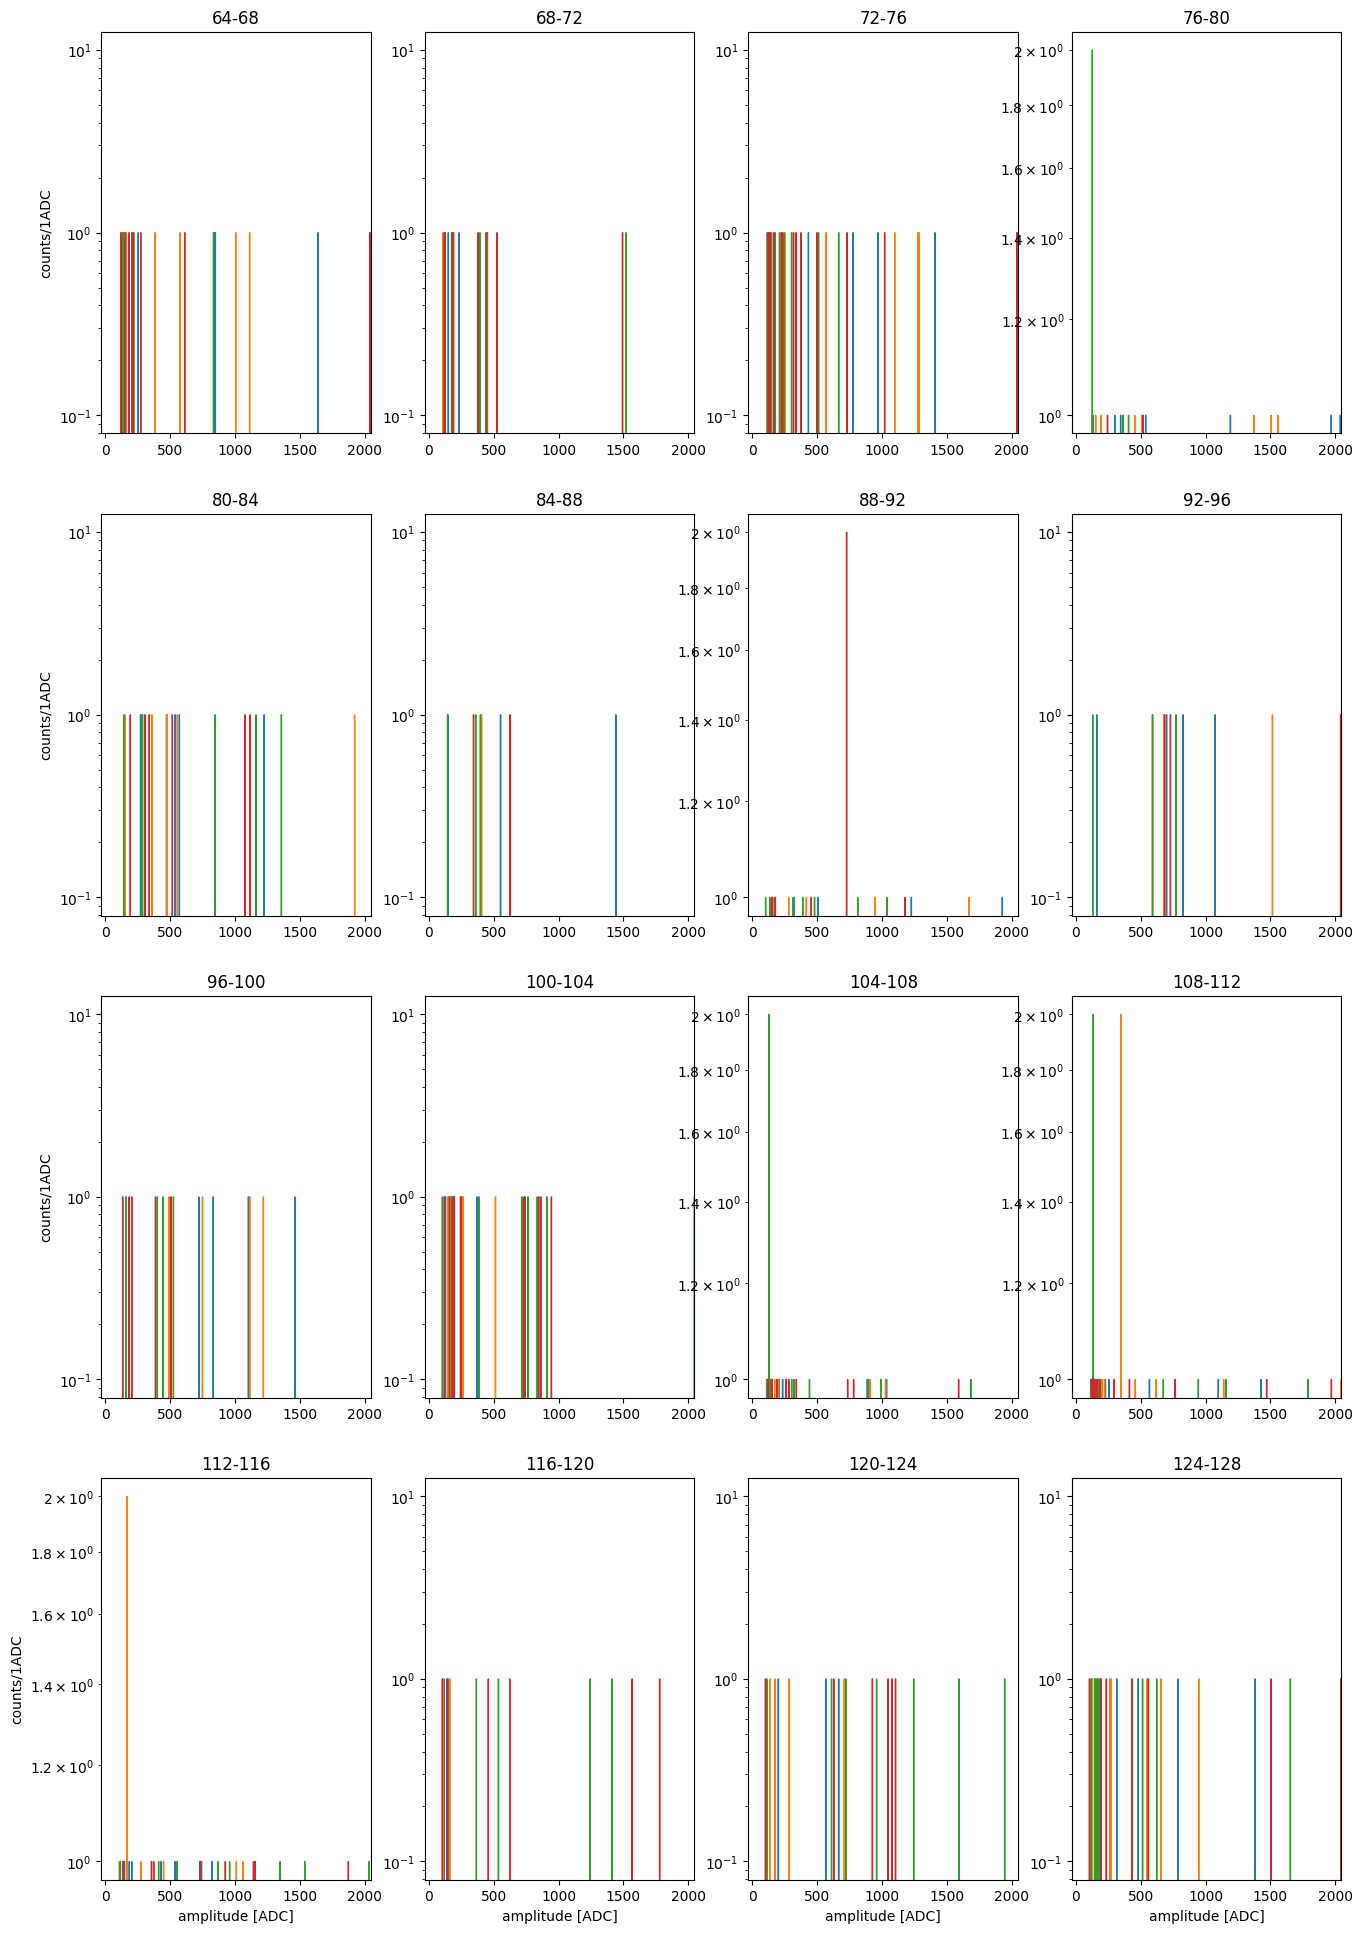

In [8]:
fig, axes = plt.subplots(4, 4, figsize=(16, 24))
axes_flat = axes.flatten()
for j, ch in enumerate(range(64,64*2)):
    ax = axes_flat[j//4]
    sel = df.channel == ch
    s_str = ["s%i" % s for s in range(8)]
    ax.hist(df[sel][s_str].values.max(axis=1)-df[sel][s_str].values.min(axis=1), 
             bins=np.arange(-100,0xfff/2,1),
             histtype="step");
    if j%4 == 0:
        ax.set_title(f"{ch}-{ch+4}")
    if j > 16*3:
        ax.set_xlabel("amplitude [ADC]")
    if j%16 == 0:
        ax.set_ylabel("counts/1ADC")
    ax.semilogy()
    ax.set_xlim([-30,0xfff//2])
#plt.tight_layout()